
___
# Recommender Systems with Python

Welcome to the code notebook for Recommender Systems with Python. In this lecture we will develop basic recommendation systems using Python and pandas.

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

There is no project for this topic, instead you have the option to work through the advanced lecture version of this notebook (totally optional!).

Let's get started!

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Get the Data

In [2]:
# column_names = ['user_id', 'item_id', 'rating', 'timestamp']
# df = pd.read_csv('u.data', sep='\t', names=column_names)

In [3]:
df = pd.read_csv('ratings.csv')

In [4]:
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Now let's get the movie titles:

In [5]:
movie_titles = pd.read_csv("movies.csv")
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


We can merge them together:

In [6]:
df = pd.merge(df,movie_titles,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


# EDA

Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Let's create a ratings dataframe with average rating and number of ratings:

In [8]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Burn Up! (1991)                                     5.0
Absolute Giganten (1999)                            5.0
Gentlemen of Fortune (Dzhentlmeny udachi) (1972)    5.0
Erik the Viking (1989)                              5.0
Reality (2014)                                      5.0
Name: rating, dtype: float64

In [9]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Name: rating, dtype: int64

In [10]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",1.750000
$9.99 (2008),3.833333
'Hellboy': The Seeds of Creation (2004),2.000000
'Neath the Arizona Skies (1934),0.500000
'Round Midnight (1986),2.250000


Now set the number of ratings column:

In [11]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


Now a few histograms:

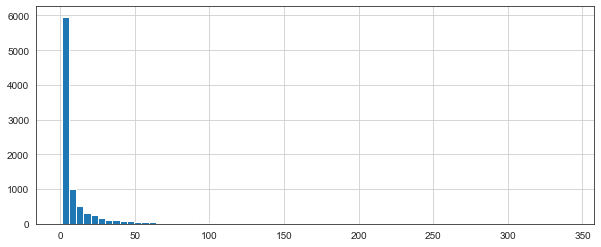

In [12]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

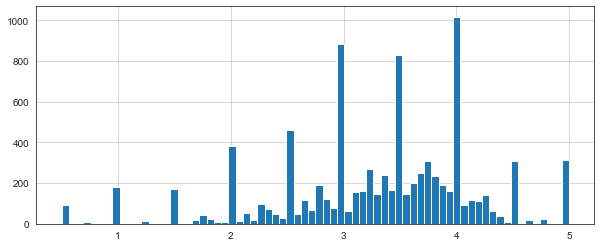

In [13]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

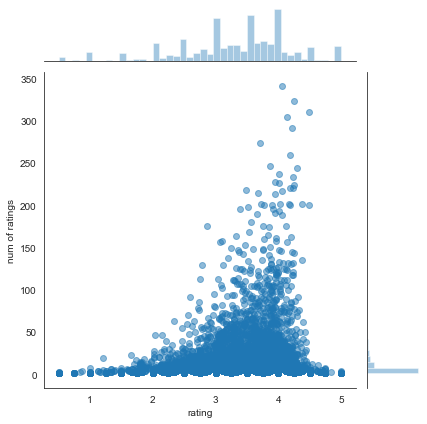

In [14]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Recommending Similar Movies

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

Most rated movie:

In [25]:
ratings.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


In [16]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.054252,341
Pulp Fiction (1994),4.256173,324
"Shawshank Redemption, The (1994)",4.487138,311
"Silence of the Lambs, The (1991)",4.138158,304
Star Wars: Episode IV - A New Hope (1977),4.221649,291
Jurassic Park (1993),3.706204,274
"Matrix, The (1999)",4.183398,259
Toy Story (1995),3.872470,247
Schindler's List (1993),4.303279,244


Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.

In [17]:
ratings.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2


Now let's grab the user ratings for those two movies:

In [18]:
# starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
liarliar_user_ratings.head()

userId
1    NaN
2    NaN
3    NaN
4    NaN
5    4.5
Name: Liar Liar (1997), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [19]:
# similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [20]:
corr_starwars = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
"'burbs, The (1989)",-0.033833
(500) Days of Summer (2009),0.621226
*batteries not included (1987),-0.555556
...And Justice for All (1979),-0.019672
10 Cloverfield Lane (2016),1.000000


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie). 

In [21]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Ghoulies II (1987),1.0
They Might Be Giants (1971),1.0
Bride & Prejudice (2004),1.0
Bride Wars (2009),1.0
"Beyond, The (E tu vivrai nel terrore - L'aldilà) (1981)",1.0
Happy Feet (2006),1.0
Wings (1927),1.0
"Devil's Own, The (1997)",1.0
Dogtooth (Kynodontas) (2009),1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [22]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",-0.033833,19
(500) Days of Summer (2009),0.621226,45
*batteries not included (1987),-0.555556,7
...And Justice for All (1979),-0.019672,13
10 Cloverfield Lane (2016),1.000000,5


Now sort the values and notice how the titles make a lot more sense:

In [23]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Austin Powers: International Man of Mystery (1997),0.732773,107
Home Alone (1990),0.651122,129
There's Something About Mary (1998),0.624706,123
Mission: Impossible (1996),0.579611,168
Finding Nemo (2003),0.571020,122


Now the same for the comedy Liar Liar:

In [24]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Austin Powers: International Man of Mystery (1997),0.732773,107
Home Alone (1990),0.651122,129
There's Something About Mary (1998),0.624706,123
Mission: Impossible (1996),0.579611,168
Finding Nemo (2003),0.571020,122
